In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import os
# import wfdb
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

# # =============================
# # Dataset folder (flat)
# # =============================
# dataset_path = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"

# # =============================
# # Training records
# # =============================
# train_records = [
#     "a01", "a02", "a03", "a04", "a05", "a06", "a07", "a08", "a09", "a10",
#     "a11", "a12", "a13", "a14", "a15", "a16", "a17", "a18", "a19", "a20",
#     "b01", "b02", "b03", "b04", "b05", "c01", "c02", "c03", "c04", "c05",
#     "c06", "c07", "c08", "c09", "c10"
# ]

# # =============================
# # Load ECG + labels
# # =============================
# def load_apnea_record(record_name):
#     # WFDB reads .hea and .dat automatically
#     record_path = os.path.join(dataset_path, record_name)
    
#     # ECG signal (single lead)
#     record = wfdb.rdrecord(record_path)
#     signal = record.p_signal[:, 0]
    
#     # Apnea annotations
#     ann = wfdb.rdann(record_path, extension="apn")
#     labels = ann.symbol  # 'A' = apnea, 'N' = normal
    
#     return signal, labels

# # =============================
# # Build dataset (1-minute windows)
# # =============================
# fs = 100
# win_size = fs * 60
# X, y = [], []

# for rec in train_records:
#     print(f"Processing {rec}...")
#     signal, labels = load_apnea_record(rec)
    
#     for i, lab in enumerate(labels):
#         start = i * win_size
#         end = start + win_size
#         if end <= len(signal):
#             segment = signal[start:end]
#             segment = (segment - np.mean(segment)) / (np.std(segment) + 1e-6)
#             X.append(segment)
#             y.append(1 if lab == "A" else 0)

# X = np.array(X).reshape(-1, win_size, 1)
# y = np.array(y)
# print("Dataset shape:", X.shape, y.shape)

# # =============================
# # Train/test split
# # =============================
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# # =============================
# # CNN + LSTM model
# # =============================
# model = models.Sequential([
#     layers.Conv1D(32, kernel_size=5, activation="relu", input_shape=(win_size,1)),
#     layers.MaxPooling1D(2),
#     layers.Conv1D(64, kernel_size=5, activation="relu"),
#     layers.MaxPooling1D(2),
#     layers.LSTM(64),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])

# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# model.summary()

# # =============================
# # Train
# # =============================
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# # =============================
# # Evaluate
# # =============================
# y_pred = (model.predict(X_test) > 0.5).astype("int32")

# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nCohen's Kappa:", cohen_kappa_score(y_test, y_pred))


In [3]:
# # =============================
# # Imports
# # =============================
# import os
# import wfdb
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
# from sklearn.utils import resample

# # =============================
# # Dataset folder (flat)
# # =============================
# dataset_path = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"

# # =============================
# # Training records
# # =============================
# train_records = [
#     "a01", "a02", "a03", "a04", "a05", "a06", "a07", "a08", "a09", "a10",
#     "a11", "a12", "a13", "a14", "a15", "a16", "a17", "a18", "a19", "a20",
#     "b01", "b02", "b03", "b04", "b05", "c01", "c02", "c03", "c04", "c05",
#     "c06", "c07", "c08", "c09", "c10"
# ]

# # =============================
# # Load ECG + labels
# # =============================
# def load_apnea_record(record_name):
#     record_path = os.path.join(dataset_path, record_name)
#     record = wfdb.rdrecord(record_path)
#     signal = record.p_signal[:, 0]  # single lead
#     ann = wfdb.rdann(record_path, extension="apn")
#     labels = ann.symbol  # 'A' = apnea, 'N' = normal
#     return signal, labels

# # =============================
# # Build dataset (1-minute windows)
# # =============================
# fs = 100
# win_size = fs * 60
# X, y = [], []

# for rec in train_records:
#     print(f"Processing {rec}...")
#     signal, labels = load_apnea_record(rec)
    
#     for i, lab in enumerate(labels):
#         start = i * win_size
#         end = start + win_size
#         if end <= len(signal):
#             segment = signal[start:end]
#             segment = (segment - np.mean(segment)) / (np.std(segment) + 1e-6)
#             X.append(segment)
#             y.append(1 if lab == "A" else 0)

# X = np.array(X).reshape(-1, win_size, 1)
# y = np.array(y)
# print("Dataset shape:", X.shape, y.shape)

# # =============================
# # Visualize 1 apnea and 1 non-apnea sample
# # =============================
# apnea_idx = np.where(y == 1)[0][0]
# non_apnea_idx = np.where(y == 0)[0][0]

# plt.figure(figsize=(12,4))
# plt.plot(X[apnea_idx], label="Apnea")
# plt.title("Example Apnea Segment")
# plt.legend()
# plt.show()

# plt.figure(figsize=(12,4))
# plt.plot(X[non_apnea_idx], label="Non-Apnea")
# plt.title("Example Non-Apnea Segment")
# plt.legend()
# plt.show()

# # =============================
# # Count apnea vs non-apnea
# # =============================
# n_apnea = np.sum(y==1)
# n_non_apnea = np.sum(y==0)
# print(f"Number of Apnea segments: {n_apnea}")
# print(f"Number of Non-Apnea segments: {n_non_apnea}")

# # =============================
# # Balance dataset
# # =============================
# if n_apnea < n_non_apnea:
#     # Upsample apnea
#     X_apnea = X[y==1]
#     y_apnea = y[y==1]
#     X_apnea_upsampled, y_apnea_upsampled = resample(
#         X_apnea, y_apnea,
#         replace=True,
#         n_samples=n_non_apnea,
#         random_state=42
#     )
#     X_balanced = np.vstack((X[y==0], X_apnea_upsampled))
#     y_balanced = np.hstack((y[y==0], y_apnea_upsampled))
# else:
#     # Upsample non-apnea
#     X_non = X[y==0]
#     y_non = y[y==0]
#     X_non_upsampled, y_non_upsampled = resample(
#         X_non, y_non,
#         replace=True,
#         n_samples=n_apnea,
#         random_state=42
#     )
#     X_balanced = np.vstack((X[y==1], X_non_upsampled))
#     y_balanced = np.hstack((y[y==1], y_non_upsampled))

# # Shuffle
# perm = np.random.permutation(len(X_balanced))
# X_balanced = X_balanced[perm]
# y_balanced = y_balanced[perm]

# print(f"Balanced dataset shape: {X_balanced.shape}, {y_balanced.shape}")

# # =============================
# # Train/test split
# # =============================
# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
# )

# # =============================
# # CNN + LSTM model
# # =============================
# model = models.Sequential([
#     layers.Conv1D(32, kernel_size=5, activation="relu", input_shape=(win_size,1)),
#     layers.MaxPooling1D(2),
#     layers.Conv1D(64, kernel_size=5, activation="relu"),
#     layers.MaxPooling1D(2),
#     layers.LSTM(64),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])

# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# model.summary()

# # =============================
# # Train
# # =============================
# history = model.fit(
#     X_train, y_train, validation_split=0.2,
#     epochs=10, batch_size=32
# )

# # =============================
# # Evaluate
# # =============================
# y_pred = (model.predict(X_test) > 0.5).astype("int32")

# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nCohen's Kappa:", cohen_kappa_score(y_test, y_pred))


In [4]:
# # =============================
# # Imports
# # =============================
# import os
# import wfdb
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
# from sklearn.utils import resample

# # =============================
# # Dataset folder (flat)
# # =============================
# dataset_path = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"

# # =============================
# # Training records
# # =============================
# train_records = [
#     "a01", "a02", "a03", "a04", "a05", "a06", "a07", "a08", "a09", "a10",
#     "a11", "a12", "a13", "a14", "a15", "a16", "a17", "a18", "a19", "a20",
#     "b01", "b02", "b03", "b04", "b05", "c01", "c02", "c03", "c04", "c05",
#     "c06", "c07", "c08", "c09", "c10"
# ]

# # =============================
# # Load ECG + labels
# # =============================
# def load_apnea_record(record_name):
#     record_path = os.path.join(dataset_path, record_name)
#     record = wfdb.rdrecord(record_path)
#     signal = record.p_signal[:, 0]  # single lead
#     ann = wfdb.rdann(record_path, extension="apn")
#     labels = ann.symbol  # 'A' = apnea, 'N' = normal
#     return signal, labels

# # =============================
# # Build dataset (1-minute windows)
# # =============================
# fs = 100
# win_size = fs * 60
# X, y = [], []

# for rec in train_records:
#     print(f"Processing {rec}...")
#     signal, labels = load_apnea_record(rec)
    
#     for i, lab in enumerate(labels):
#         start = i * win_size
#         end = start + win_size
#         if end <= len(signal):
#             segment = signal[start:end]
#             segment = (segment - np.mean(segment)) / (np.std(segment) + 1e-6)
#             X.append(segment)
#             y.append(1 if lab == "A" else 0)

# X = np.array(X).reshape(-1, win_size, 1)
# y = np.array(y)
# print("Dataset shape:", X.shape, y.shape)

# # =============================
# # Visualize Apnea vs Non-Apnea Overlay
# # =============================
# apnea_idx = np.where(y == 1)[0][0]
# non_apnea_idx = np.where(y == 0)[0][0]

# plt.figure(figsize=(12, 5))
# plt.plot(X[apnea_idx], label="Apnea", color="red", alpha=0.7)
# plt.plot(X[non_apnea_idx], label="Non-Apnea", color="blue", alpha=0.7)
# plt.title("Apnea vs Non-Apnea Segment (Overlay)")
# plt.xlabel("Time (samples)")
# plt.ylabel("Normalized Amplitude")
# plt.legend()
# plt.show()

# # =============================
# # Count apnea vs non-apnea
# # =============================
# n_apnea = np.sum(y==1)
# n_non_apnea = np.sum(y==0)
# print(f"Number of Apnea segments: {n_apnea}")
# print(f"Number of Non-Apnea segments: {n_non_apnea}")

# # =============================
# # Balance dataset
# # =============================
# if n_apnea < n_non_apnea:
#     # Upsample apnea
#     X_apnea = X[y==1]
#     y_apnea = y[y==1]
#     X_apnea_upsampled, y_apnea_upsampled = resample(
#         X_apnea, y_apnea,
#         replace=True,
#         n_samples=n_non_apnea,
#         random_state=42
#     )
#     X_balanced = np.vstack((X[y==0], X_apnea_upsampled))
#     y_balanced = np.hstack((y[y==0], y_apnea_upsampled))
# else:
#     # Upsample non-apnea
#     X_non = X[y==0]
#     y_non = y[y==0]
#     X_non_upsampled, y_non_upsampled = resample(
#         X_non, y_non,
#         replace=True,
#         n_samples=n_apnea,
#         random_state=42
#     )
#     X_balanced = np.vstack((X[y==1], X_non_upsampled))
#     y_balanced = np.hstack((y[y==1], y_non_upsampled))

# # Shuffle
# perm = np.random.permutation(len(X_balanced))
# X_balanced = X_balanced[perm]
# y_balanced = y_balanced[perm]

# print(f"Balanced dataset shape: {X_balanced.shape}, {y_balanced.shape}")

# # =============================
# # Train/test split
# # =============================
# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
# )

# # =============================
# # CNN + LSTM model
# # =============================
# model = models.Sequential([
#     layers.Conv1D(32, kernel_size=5, activation="relu", input_shape=(win_size,1)),
#     layers.MaxPooling1D(2),
#     layers.Conv1D(64, kernel_size=5, activation="relu"),
#     layers.MaxPooling1D(2),
#     layers.LSTM(64),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])

# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# model.summary()

# # =============================
# # Train
# # =============================
# history = model.fit(
#     X_train, y_train, validation_split=0.2,
#     epochs=10, batch_size=32
# )

# # =============================
# # Evaluate
# # =============================
# y_pred = (model.predict(X_test) > 0.5).astype("int32")

# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nCohen's Kappa:", cohen_kappa_score(y_test, y_pred))


In [ ]:
# # =============================
# # Imports
# # =============================
# import os
# import wfdb
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
# from sklearn.utils import resample
# from scipy.signal import butter, filtfilt

# # =============================
# # Dataset folder (flat)
# # =============================
# dataset_path = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"

# # =============================
# # Training records
# # =============================
# train_records = [
#     "a01", "a02", "a03", "a04", "a05", "a06", "a07", "a08", "a09", "a10",
#     "a11", "a12", "a13", "a14", "a15", "a16", "a17", "a18", "a19", "a20",
#     "b01", "b02", "b03", "b04", "b05", "c01", "c02", "c03", "c04", "c05",
#     "c06", "c07", "c08", "c09", "c10"
# ]

# # =============================
# # Load ECG + labels
# # =============================
# def load_apnea_record(record_name):
#     record_path = os.path.join(dataset_path, record_name)
#     record = wfdb.rdrecord(record_path)
#     signal = record.p_signal[:, 0]  # single lead
#     ann = wfdb.rdann(record_path, extension="apn")
#     labels = ann.symbol  # 'A' = apnea, 'N' = normal
#     return signal, labels

# # =============================
# # Bandpass Filter (0.5–40 Hz)
# # =============================
# def bandpass_filter(signal, fs=100, low=0.5, high=40):
#     nyquist = 0.5 * fs
#     b, a = butter(4, [low/nyquist, high/nyquist], btype="band")
#     return filtfilt(b, a, signal)

# # =============================
# # Build dataset (1-minute windows with preprocessing)
# # =============================
# fs = 100
# win_size = fs * 60
# X, y = [], []

# for rec in train_records:
#     print(f"Processing {rec}...")
#     signal, labels = load_apnea_record(rec)

#     # Apply bandpass filter
#     signal = bandpass_filter(signal, fs=fs)

#     for i, lab in enumerate(labels):
#         start = i * win_size
#         end = start + win_size
#         if end <= len(signal):
#             segment = signal[start:end]

#             # Normalize (z-score)
#             segment = (segment - np.mean(segment)) / (np.std(segment) + 1e-6)

#             X.append(segment)
#             y.append(1 if lab == "A" else 0)

# X = np.array(X).reshape(-1, win_size, 1)
# y = np.array(y)
# print("Dataset shape:", X.shape, y.shape)

# # =============================
# # Visualize Apnea vs Non-Apnea Overlay
# # =============================
# apnea_idx = np.where(y == 1)[0][0]
# non_apnea_idx = np.where(y == 0)[0][0]

# plt.figure(figsize=(12, 5))
# plt.plot(X[apnea_idx], label="Apnea", color="red", alpha=0.7)
# plt.plot(X[non_apnea_idx], label="Non-Apnea", color="blue", alpha=0.7)
# plt.title("Apnea vs Non-Apnea Segment (Overlay, Preprocessed)")
# plt.xlabel("Time (samples)")
# plt.ylabel("Normalized Amplitude")
# plt.legend()
# plt.show()

# # =============================
# # Count apnea vs non-apnea
# # =============================
# n_apnea = np.sum(y==1)
# n_non_apnea = np.sum(y==0)
# print(f"Number of Apnea segments: {n_apnea}")
# print(f"Number of Non-Apnea segments: {n_non_apnea}")

# # =============================
# # Balance dataset
# # =============================
# if n_apnea < n_non_apnea:
#     # Upsample apnea
#     X_apnea = X[y==1]
#     y_apnea = y[y==1]
#     X_apnea_upsampled, y_apnea_upsampled = resample(
#         X_apnea, y_apnea,
#         replace=True,
#         n_samples=n_non_apnea,
#         random_state=42
#     )
#     X_balanced = np.vstack((X[y==0], X_apnea_upsampled))
#     y_balanced = np.hstack((y[y==0], y_apnea_upsampled))
# else:
#     # Upsample non-apnea
#     X_non = X[y==0]
#     y_non = y[y==0]
#     X_non_upsampled, y_non_upsampled = resample(
#         X_non, y_non,
#         replace=True,
#         n_samples=n_apnea,
#         random_state=42
#     )
#     X_balanced = np.vstack((X[y==1], X_non_upsampled))
#     y_balanced = np.hstack((y[y==1], y_non_upsampled))

# # Shuffle
# perm = np.random.permutation(len(X_balanced))
# X_balanced = X_balanced[perm]
# y_balanced = y_balanced[perm]

# print(f"Balanced dataset shape: {X_balanced.shape}, {y_balanced.shape}")

# # =============================
# # Train/test split
# # =============================
# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
# )

# # =============================
# # Improved CNN + LSTM model
# # =============================
# model = models.Sequential([
#     layers.Conv1D(64, kernel_size=7, activation="relu", input_shape=(win_size,1)),
#     layers.BatchNormalization(),
#     layers.MaxPooling1D(2),

#     layers.Conv1D(128, kernel_size=5, activation="relu"),
#     layers.BatchNormalization(),
#     layers.MaxPooling1D(2),

#     layers.LSTM(64, return_sequences=False),
#     layers.Dropout(0.5),

#     layers.Dense(128, activation="relu"),
#     layers.Dropout(0.5),
#     layers.Dense(1, activation="sigmoid")
# ])

# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
# model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
# model.summary()

# # =============================
# # Train
# # =============================
# history = model.fit(
#     X_train, y_train, validation_split=0.2,
#     epochs=20, batch_size=32,
#     callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)]
# )

# # =============================
# # Evaluate
# # =============================
# y_pred = (model.predict(X_test) > 0.5).astype("int32")

# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nCohen's Kappa:", cohen_kappa_score(y_test, y_pred))


In [2]:
!pip install wfdb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.1 MB/s eta 0:00:00


In [4]:
!pip install neurokit2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 18.7 MB/s eta 0:00:0000:01


In [3]:
# ======================================================
# PyTorch implementation based on:
# "An Automatic Sleep Apnoea Detection Method Based on
#  Multi-Context-Scale CNN-LSTM and Contrastive Learning With ECG"
#
# Safe version with NaN handling and classification loss only
# ======================================================

import os
import wfdb
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score

# ---------------------------
# Config
# ---------------------------
DATASET_PATH = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"
RECORDS_TRAIN = [
    "a01","a02","a03","a04","a05","a06","a07","a08","a09","a10",
    "a11","a12","a13","a14","a15","a16","a17","a18","a19","a20",
    "b01","b02","b03","b04","b05","c01","c02","c03","c04","c05",
    "c06","c07","c08","c09","c10"
]
ORIG_FS = 100
WINDOW_MINUTES = 5
STRIDE_MINUTES = 1
WIN_SIZE_ORIG = ORIG_FS * 60 * WINDOW_MINUTES
STEP_ORIG = ORIG_FS * 60 * STRIDE_MINUTES
CTX_MINUTES = [1, 3, 5]   # short, mid, long contexts
SEQ_LEN = 300
BATCH_SIZE = 32
EPOCHS = 30
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MAX_WINDOWS_PER_RECORD = None  # for debugging, e.g. 200

# ---------------------------
# Preprocessing
# ---------------------------
def bandpass(sig, fs=ORIG_FS, low=3.0, high=45.0, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [low/nyq, high/nyq], btype='band')
    return filtfilt(b, a, sig)

def extract_window_from_record(record_name, start_orig, length_orig=WIN_SIZE_ORIG):
    rec_path = os.path.join(DATASET_PATH, record_name)
    rec = wfdb.rdrecord(rec_path)
    sig = rec.p_signal[:,0].astype(np.float32)
    if start_orig + length_orig > len(sig):
        return None
    return sig[start_orig:start_orig+length_orig]

def detect_rpeaks_simple(ecg_segment, fs=ORIG_FS):
    ecg = ecg_segment - np.median(ecg_segment)
    ecg_abs = np.abs(ecg)
    th = np.median(ecg_abs) + 0.5 * np.std(ecg_abs)
    min_dist = int(0.35 * fs)
    peaks, _ = find_peaks(ecg_abs, height=th, distance=min_dist)
    return peaks

def build_rri_ra_sequences(segment, fs=ORIG_FS):
    peaks = detect_rpeaks_simple(segment, fs=fs)
    if peaks is None or len(peaks) < 2:
        return None, None
    rri = np.diff(peaks) * 1000.0 / fs
    ra = segment[peaks[:-1]]
    if len(rri) == 0 or len(ra) == 0:
        return None, None
    return rri.astype(np.float32), ra.astype(np.float32)

def resample_seq(seq, target_len):
    seq = np.asarray(seq)
    if seq.ndim == 1:
        seq = seq[:, None]
    n = seq.shape[0]
    if n < 2:
        return np.zeros((target_len, seq.shape[1]), dtype=np.float32)
    x_old = np.linspace(0,1,n)
    x_new = np.linspace(0,1,target_len)
    kind = "linear" if n < 4 else "cubic"
    try:
        f = interp1d(x_old, seq, axis=0, kind=kind, fill_value="extrapolate")
        out = f(x_new)
    except Exception:
        out = np.zeros((target_len, seq.shape[1]), dtype=np.float32)
    out = np.nan_to_num(out, nan=0.0, posinf=0.0, neginf=0.0)
    return out

# ---------------------------
# Build index (record, start_orig, label)
# ---------------------------
def build_index(records):
    idx = []
    for rec in records:
        rec_path = os.path.join(DATASET_PATH, rec)
        try:
            ann = wfdb.rdann(rec_path, extension='apn')
            labels = ann.symbol
            total_len = wfdb.rdrecord(rec_path).p_signal.shape[0]
        except Exception as e:
            print("Failed reading", rec, e)
            continue
        starts = list(range(0, total_len - WIN_SIZE_ORIG + 1, STEP_ORIG))
        if MAX_WINDOWS_PER_RECORD:
            starts = starts[:MAX_WINDOWS_PER_RECORD]
        for s in starts:
            label_idx = s // (ORIG_FS * 60)
            lab_window = labels[label_idx:label_idx + WINDOW_MINUTES]
            lab = 1 if 'A' in lab_window else 0
            idx.append((rec, int(s), int(lab)))
    return idx

# ---------------------------
# Dataset
# ---------------------------
class ApneaDataset(Dataset):
    def __init__(self, index_list, ctx_minutes=CTX_MINUTES, seq_len=SEQ_LEN):
        self.index_list = index_list
        self.ctx_minutes = ctx_minutes
        self.seq_len = seq_len

    def __len__(self):
        return len(self.index_list)

    def __getitem__(self, idx):
        rec, start_orig, label = self.index_list[idx]
        window = extract_window_from_record(rec, start_orig, WIN_SIZE_ORIG)
        if window is None:
            zero = np.zeros((self.seq_len, 2), dtype=np.float32)
            return torch.from_numpy(zero), torch.from_numpy(zero), torch.from_numpy(zero), torch.tensor(label)

        window_bp = bandpass(window, fs=ORIG_FS, low=3.0, high=45.0)
        results = []
        for m in self.ctx_minutes:
            c_samples = min(m*ORIG_FS*60, WIN_SIZE_ORIG)
            start = (WIN_SIZE_ORIG - c_samples)//2
            segment = window_bp[start:start+c_samples]
            rri, ra = build_rri_ra_sequences(segment, fs=ORIG_FS)
            if rri is None:
                results.append(np.zeros((self.seq_len,2),dtype=np.float32))
                continue
            rri_std, ra_std = np.std(rri), np.std(ra)
            if rri_std < 1e-6: rri_std = 1.0
            if ra_std < 1e-6: ra_std = 1.0
            rri_z = (rri - np.mean(rri)) / rri_std
            ra_z  = (ra  - np.mean(ra))  / ra_std
            merged = np.stack([rri_z, ra_z], axis=1)
            merged_rs = resample_seq(merged, self.seq_len)
            results.append(merged_rs.astype(np.float32))

        s,m,l = results
        return torch.from_numpy(s), torch.from_numpy(m), torch.from_numpy(l), torch.tensor(label, dtype=torch.long)

def collate_fn(batch):
    short = torch.stack([b[0] for b in batch], dim=0)
    mid   = torch.stack([b[1] for b in batch], dim=0)
    long  = torch.stack([b[2] for b in batch], dim=0)
    labels = torch.stack([b[3] for b in batch], dim=0)
    return short, mid, long, labels

# ---------------------------
# Model components
# ---------------------------
class DilatedConvBlock(nn.Module):
    def __init__(self, in_ch, out_ch, kernel=3, dilation=1, dropout=0.2):
        super().__init__()
        self.conv = nn.Conv1d(in_ch, out_ch, kernel_size=kernel,
                              padding=dilation*(kernel-1)//2, dilation=dilation)
        self.bn = nn.BatchNorm1d(out_ch)
        self.act = nn.ReLU()
        self.drop = nn.Dropout(dropout)
    def forward(self,x):
        return self.drop(self.act(self.bn(self.conv(x))))

class BranchCNNLSTM(nn.Module):
    def __init__(self, in_channels=2, conv_channels=32, lstm_hidden=64, dropout=0.1):
        super().__init__()
        self.blocks = nn.Sequential(
            DilatedConvBlock(in_channels, conv_channels, dilation=1, dropout=dropout),
            DilatedConvBlock(conv_channels, conv_channels, dilation=2, dropout=dropout),
            DilatedConvBlock(conv_channels, conv_channels, dilation=4, dropout=dropout),
            DilatedConvBlock(conv_channels, conv_channels, dilation=8, dropout=dropout),
        )
        self.avgpool = nn.AvgPool1d(4)
        self.bilstm = nn.LSTM(conv_channels, lstm_hidden,
                              batch_first=True, bidirectional=True)
    def forward(self, x):
        x = self.blocks(x)
        x = self.avgpool(x)
        x = x.permute(0,2,1)
        _, (h_n, _) = self.bilstm(x)
        h = torch.cat([h_n[-2], h_n[-1]], dim=1)
        return h

class ApneaNet(nn.Module):
    def __init__(self, branch_ch=32, lstm_hidden=64, transformer_dim=128):
        super().__init__()
        self.branch_short = BranchCNNLSTM(2, branch_ch, lstm_hidden)
        self.branch_mid   = BranchCNNLSTM(2, branch_ch, lstm_hidden)
        self.branch_long  = BranchCNNLSTM(2, branch_ch, lstm_hidden)
        feat_dim = lstm_hidden*2
        self.proj = nn.Linear(feat_dim, transformer_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=transformer_dim, nhead=4, dim_feedforward=256,
            dropout=0.1, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.classifier = nn.Sequential(
            nn.Linear(transformer_dim, transformer_dim//2),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(transformer_dim//2, 2)
        )
    def forward(self, s,m,l):
        s = self.branch_short(s.permute(0,2,1))
        m = self.branch_mid(m.permute(0,2,1))
        l = self.branch_long(l.permute(0,2,1))
        tokens = torch.stack([s,m,l], dim=1)
        tokens = self.proj(tokens)
        fused = self.transformer(tokens).mean(dim=1)
        logits = self.classifier(fused)
        return logits

# ---------------------------
# Loss
# ---------------------------
def squared_hinge_loss_from_logits(logits, labels):
    y = labels.float().to(logits.device)
    score = logits[:,1] - logits[:,0]
    y_signed = 2*y - 1
    margin = 1.0 - score * y_signed
    return torch.mean(torch.clamp(margin, min=0)**2)

# ---------------------------
# Build dataset and loaders
# ---------------------------
print("Building index...")
index_list = build_index(RECORDS_TRAIN)
print("Total windows:", len(index_list))
train_idx, test_idx = train_test_split(
    index_list, test_size=0.2,
    stratify=[x[2] for x in index_list], random_state=42)
train_ds = ApneaDataset(train_idx)
test_ds  = ApneaDataset(test_idx)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE,
                          shuffle=True, collate_fn=collate_fn, num_workers=2)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE,
                          shuffle=False, collate_fn=collate_fn, num_workers=2)

# ---------------------------
# Train
# ---------------------------
model = ApneaNet().to(DEVICE)
opt = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)

for epoch in range(1, EPOCHS+1):
    model.train()
    train_loss = 0
    for s,m,l,y in tqdm(train_loader, desc=f"Train {epoch}"):
        s,m,l,y = s.to(DEVICE), m.to(DEVICE), l.to(DEVICE), y.to(DEVICE)
        opt.zero_grad()
        logits = model(s,m,l)
        loss = squared_hinge_loss_from_logits(logits, y)
        loss.backward()
        opt.step()
        train_loss += loss.item()
    avg_train_loss = train_loss/len(train_loader)

    model.eval()
    all_preds, all_labels = [], []
    val_loss = 0
    with torch.no_grad():
        for s,m,l,y in test_loader:
            s,m,l,y = s.to(DEVICE), m.to(DEVICE), l.to(DEVICE), y.to(DEVICE)
            logits = model(s,m,l)
            loss = squared_hinge_loss_from_logits(logits, y)
            val_loss += loss.item()
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            all_preds.extend(preds.tolist())
            all_labels.extend(y.cpu().numpy().tolist())
    avg_val_loss = val_loss/len(test_loader)
    acc = metrics.accuracy_score(all_labels, all_preds)
    f1 = metrics.f1_score(all_labels, all_preds, zero_division=0)
    print(f"Epoch {epoch}: train_loss={avg_train_loss:.4f}, val_loss={avg_val_loss:.4f}, acc={acc:.4f}, f1={f1:.4f}")

print("Final Report:")
print(classification_report(all_labels, all_preds))
print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))
print("Cohen's Kappa:", cohen_kappa_score(all_labels, all_preds))


Building index...
Total windows: 16928


Train 1: 100%|██████████| 424/424 [03:01<00:00,  2.34it/s]


Epoch 1: train_loss=0.7414, val_loss=0.7699, acc=0.7147, f1=0.7336


Train 2: 100%|██████████| 424/424 [03:01<00:00,  2.34it/s]


Epoch 2: train_loss=0.5231, val_loss=0.4136, acc=0.8653, f1=0.8472


Train 3: 100%|██████████| 424/424 [03:03<00:00,  2.31it/s]


Epoch 3: train_loss=0.4307, val_loss=0.4620, acc=0.8429, f1=0.8373


Train 4: 100%|██████████| 424/424 [03:03<00:00,  2.31it/s]


Epoch 4: train_loss=0.4154, val_loss=0.3716, acc=0.8757, f1=0.8567


Train 5: 100%|██████████| 424/424 [03:00<00:00,  2.35it/s]


Epoch 5: train_loss=0.4039, val_loss=0.3634, acc=0.8963, f1=0.8778


Train 6: 100%|██████████| 424/424 [03:03<00:00,  2.31it/s]


Epoch 6: train_loss=0.3829, val_loss=0.3514, acc=0.8907, f1=0.8758


Train 7: 100%|██████████| 424/424 [03:03<00:00,  2.31it/s]


Epoch 7: train_loss=0.3632, val_loss=0.3731, acc=0.8904, f1=0.8780


Train 8: 100%|██████████| 424/424 [03:06<00:00,  2.28it/s]


Epoch 8: train_loss=0.3590, val_loss=0.3150, acc=0.9002, f1=0.8864


Train 9: 100%|██████████| 424/424 [03:03<00:00,  2.31it/s]


Epoch 9: train_loss=0.3453, val_loss=0.3177, acc=0.8996, f1=0.8758


Train 10: 100%|██████████| 424/424 [03:02<00:00,  2.32it/s]


Epoch 10: train_loss=0.3572, val_loss=0.3529, acc=0.8990, f1=0.8861


Train 11: 100%|██████████| 424/424 [03:02<00:00,  2.32it/s]


Epoch 11: train_loss=0.3304, val_loss=0.3006, acc=0.9019, f1=0.8900


Train 12: 100%|██████████| 424/424 [03:01<00:00,  2.34it/s]


Epoch 12: train_loss=0.3349, val_loss=0.2935, acc=0.9019, f1=0.8846


Train 13: 100%|██████████| 424/424 [03:00<00:00,  2.35it/s]


Epoch 13: train_loss=0.3171, val_loss=0.2906, acc=0.9082, f1=0.8916


Train 14: 100%|██████████| 424/424 [03:05<00:00,  2.29it/s]


Epoch 14: train_loss=0.3436, val_loss=0.3396, acc=0.8940, f1=0.8763


Train 15: 100%|██████████| 424/424 [03:06<00:00,  2.27it/s]


Epoch 15: train_loss=0.3985, val_loss=0.3300, acc=0.8940, f1=0.8716


Train 16: 100%|██████████| 424/424 [03:03<00:00,  2.31it/s]


Epoch 16: train_loss=0.3567, val_loss=0.3177, acc=0.8999, f1=0.8783


Train 17: 100%|██████████| 424/424 [03:00<00:00,  2.35it/s]


Epoch 17: train_loss=0.3171, val_loss=0.3374, acc=0.9043, f1=0.8914


Train 18: 100%|██████████| 424/424 [03:00<00:00,  2.35it/s]


Epoch 18: train_loss=0.3169, val_loss=0.2895, acc=0.9067, f1=0.8890


Train 19: 100%|██████████| 424/424 [02:59<00:00,  2.36it/s]


Epoch 19: train_loss=0.3083, val_loss=0.2852, acc=0.9146, f1=0.9002


Train 20: 100%|██████████| 424/424 [03:06<00:00,  2.28it/s]


Epoch 20: train_loss=0.3005, val_loss=0.2985, acc=0.9017, f1=0.8914


Train 21: 100%|██████████| 424/424 [03:07<00:00,  2.26it/s]


Epoch 21: train_loss=0.3051, val_loss=0.2808, acc=0.9108, f1=0.8969


Train 22: 100%|██████████| 424/424 [03:10<00:00,  2.23it/s]


Epoch 22: train_loss=0.3000, val_loss=0.2991, acc=0.9105, f1=0.8961


Train 23: 100%|██████████| 424/424 [03:17<00:00,  2.15it/s]


Epoch 23: train_loss=0.2919, val_loss=0.2869, acc=0.9073, f1=0.8916


Train 24: 100%|██████████| 424/424 [03:12<00:00,  2.20it/s]


Epoch 24: train_loss=0.3307, val_loss=0.3375, acc=0.8943, f1=0.8700


Train 25: 100%|██████████| 424/424 [03:11<00:00,  2.21it/s]


Epoch 25: train_loss=0.3139, val_loss=0.2827, acc=0.9076, f1=0.8958


Train 26: 100%|██████████| 424/424 [03:14<00:00,  2.18it/s]


Epoch 26: train_loss=0.3178, val_loss=0.3500, acc=0.8904, f1=0.8691


Train 27: 100%|██████████| 424/424 [03:15<00:00,  2.17it/s]


Epoch 27: train_loss=0.3703, val_loss=0.3461, acc=0.8963, f1=0.8748


Train 28: 100%|██████████| 424/424 [03:06<00:00,  2.28it/s]


Epoch 28: train_loss=0.3939, val_loss=0.3186, acc=0.8990, f1=0.8797


Train 29: 100%|██████████| 424/424 [03:04<00:00,  2.30it/s]


Epoch 29: train_loss=0.3602, val_loss=0.3343, acc=0.8963, f1=0.8839


Train 30: 100%|██████████| 424/424 [03:03<00:00,  2.32it/s]


Epoch 30: train_loss=0.3119, val_loss=0.3098, acc=0.9055, f1=0.8896
Final Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1881
           1       0.93      0.86      0.89      1505

    accuracy                           0.91      3386
   macro avg       0.91      0.90      0.90      3386
weighted avg       0.91      0.91      0.91      3386

Confusion Matrix:
 [[1777  104]
 [ 216 1289]]
Cohen's Kappa: 0.8071924861442732


In [3]:
!pip install wfdb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.7 MB/s eta 0:00:00


In [4]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 15.5 MB/s eta 0:00:0000:01


In [6]:
# ======================================================
# High-Accuracy Apnea Detection (CNN + BiLSTM + Transformer)
# With data augmentation, class balancing, and safe R-peak handling
# ======================================================

import os, wfdb, numpy as np
from scipy.signal import butter, filtfilt, find_peaks
from scipy.interpolate import interp1d
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from torch.utils.data import Dataset, DataLoader
import torch, torch.nn as nn, torch.nn.functional as F
from tqdm import tqdm
import random

# ---------------------------
# Config
# ---------------------------
DATASET_PATH = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"
ORIG_FS = 100
WIN_MIN = 5
STRIDE_MIN = 1
WIN_SIZE = ORIG_FS * 60 * WIN_MIN
STEP = ORIG_FS * 60 * STRIDE_MIN
SEQ_LEN = 300
BATCH_SIZE = 32
EPOCHS = 25
LR = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ---------------------------
# Preprocessing
# ---------------------------
def bandpass(sig, fs=ORIG_FS, low=3.0, high=45.0, order=4):
    nyq = 0.5*fs
    b, a = butter(order, [low/nyq, high/nyq], btype="band")
    return filtfilt(b, a, sig)

def detect_rpeaks(sig, fs=ORIG_FS):
    sig = sig - np.median(sig)
    th = np.median(np.abs(sig)) + 0.5*np.std(sig)
    min_dist = int(0.35*fs)
    peaks, _ = find_peaks(np.abs(sig), height=th, distance=min_dist)
    return peaks

def build_rri_ra(segment, fs=ORIG_FS):
    peaks = detect_rpeaks(segment, fs)
    if len(peaks) < 2:
        return None
    rri = np.diff(peaks) * 1000 / fs
    ra = segment[peaks[:-1]]
    return rri.astype(np.float32), ra.astype(np.float32)

def resample_seq(seq, target_len=SEQ_LEN):
    if len(seq) < 2:
        return np.zeros(target_len)
    x_old = np.linspace(0, 1, len(seq))
    x_new = np.linspace(0, 1, target_len)
    f = interp1d(x_old, seq, kind="linear", fill_value="extrapolate")
    return f(x_new).astype(np.float32)

def augment_signal(sig):
    """Basic data augmentation: jitter, scaling, and shifting"""
    if random.random() < 0.5:
        sig = sig + 0.01*np.random.randn(len(sig))
    if random.random() < 0.5:
        sig = sig * (0.9 + 0.2*np.random.rand())
    if random.random() < 0.3:
        shift = int(0.05*len(sig))
        sig = np.roll(sig, shift)
    return sig

def build_index(records):
    idx = []
    for rec in records:
        try:
            ann = wfdb.rdann(os.path.join(DATASET_PATH, rec), "apn")
            labels = ann.symbol
            total_len = wfdb.rdrecord(os.path.join(DATASET_PATH, rec)).p_signal.shape[0]
        except:
            continue
        starts = range(0, total_len-WIN_SIZE+1, STEP)
        for s in starts:
            minute = s // (ORIG_FS*60)
            window_labels = labels[minute:minute+WIN_MIN]
            lab = 1 if "A" in window_labels else 0
            idx.append((rec, s, lab))
    return idx

# ---------------------------
# Dataset
# ---------------------------
class ApneaDataset(Dataset):
    def __init__(self, index, seq_len=SEQ_LEN, augment=False):
        self.index = index
        self.seq_len = seq_len
        self.augment = augment

    def __len__(self):
        return len(self.index)

    def __getitem__(self, idx):
        rec, s, label = self.index[idx]
        rec_path = os.path.join(DATASET_PATH, rec)
        sig = wfdb.rdrecord(rec_path).p_signal[:, 0].astype(np.float32)

        window = sig[s:s + WIN_SIZE]
        if self.augment:
            window = augment_signal(window)

        window = bandpass(window)

        # ✅ Safe unpacking
        result = build_rri_ra(window)
        if result is None:
            rri, ra = None, None
        else:
            rri, ra = result

        if rri is None:
            feat_seq = np.zeros((self.seq_len, 2), dtype=np.float32)
        else:
            rri = (rri - np.mean(rri)) / (np.std(rri) + 1e-6)
            ra = (ra - np.mean(ra)) / (np.std(ra) + 1e-6)
            feat_seq = np.stack(
                [resample_seq(rri, self.seq_len),
                 resample_seq(ra, self.seq_len)],
                axis=1
            )

        return torch.from_numpy(feat_seq), torch.tensor(label, dtype=torch.long)

# ---------------------------
# Model
# ---------------------------
class BranchCNNLSTM(nn.Module):
    def __init__(self, in_ch=2, conv_ch=64, hidden=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, conv_ch, 7, padding=3), nn.ReLU(), nn.BatchNorm1d(conv_ch),
            nn.Conv1d(conv_ch, conv_ch, 5, padding=2), nn.ReLU(), nn.BatchNorm1d(conv_ch),
            nn.Conv1d(conv_ch, conv_ch, 3, padding=1), nn.ReLU(), nn.BatchNorm1d(conv_ch),
        )
        self.pool = nn.AdaptiveAvgPool1d(100)
        self.lstm = nn.LSTM(conv_ch, hidden, batch_first=True, bidirectional=True)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # BxCxT
        x = self.conv(x)
        x = self.pool(x)
        x = x.permute(0, 2, 1)
        _, (h, _) = self.lstm(x)
        return torch.cat([h[-2], h[-1]], dim=1)

class ApneaNet(nn.Module):
    def __init__(self, hidden=128, proj_dim=256):
        super().__init__()
        self.branch = BranchCNNLSTM(2, 64, hidden)
        self.proj = nn.Linear(hidden*2, proj_dim)
        encoder = nn.TransformerEncoderLayer(
            d_model=proj_dim, nhead=8, dim_feedforward=512, dropout=0.3, batch_first=True
        )
        self.trans = nn.TransformerEncoder(encoder, num_layers=3)
        self.fc = nn.Sequential(
            nn.Linear(proj_dim, 128), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        bfeat = self.branch(x)
        tokens = self.proj(bfeat).unsqueeze(1)  # [B,1,D]
        out = self.trans(tokens).mean(dim=1)
        return self.fc(out)

# ---------------------------
# Training function
# ---------------------------
def train_eval(train_idx, test_idx, all_index, class_weights=None):
    train_ds = ApneaDataset([all_index[i] for i in train_idx], augment=True)
    test_ds = ApneaDataset([all_index[i] for i in test_idx])
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

    model = ApneaNet().to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=EPOCHS)

    if class_weights is not None:
        weights = torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)
        crit = nn.CrossEntropyLoss(weight=weights)
    else:
        crit = nn.CrossEntropyLoss()

    for ep in range(EPOCHS):
        model.train(); total_loss = 0
        pbar = tqdm(train_loader, desc=f"Epoch {ep+1}/{EPOCHS}")
        for X, y in pbar:
            X, y = X.to(DEVICE), y.to(DEVICE)
            opt.zero_grad()
            out = model(X)
            loss = crit(out, y)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            opt.step()
            total_loss += loss.item()
        scheduler.step()
        print(f"Epoch {ep+1}: Loss={total_loss/len(train_loader):.4f}")

    # eval
    model.eval(); preds, gts = [], []
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(DEVICE)
            out = model(X)
            preds += out.argmax(1).cpu().tolist()
            gts += y.tolist()
    acc = accuracy_score(gts, preds)
    f1 = f1_score(gts, preds)
    kappa = cohen_kappa_score(gts, preds)
    return acc, f1, kappa, classification_report(gts, preds, zero_division=0)

# ---------------------------
# Cross-validation
# ---------------------------
records = [f"a{str(i).zfill(2)}" for i in range(1, 21)]
index = build_index(records)
labels = [x[2] for x in index]

# Compute class weights
pos = sum(labels); neg = len(labels)-pos
cw = [1.0, neg/max(pos,1)]  # weight apnea higher

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
accs, f1s, kappas = [], [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(index, labels), 1):
    print(f"\n===== Fold {fold} =====")
    acc, f1, kappa, rep = train_eval(train_idx, test_idx, index, class_weights=cw)
    accs.append(acc); f1s.append(f1); kappas.append(kappa)
    print(rep)
    print(f"Fold {fold}: Acc={acc:.4f}, F1={f1:.4f}, Kappa={kappa:.4f}")

print("\n==== Final Results ====")
print(f"Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}")
print(f"F1-score: {np.mean(f1s):.4f}")
print(f"Cohen’s Kappa: {np.mean(kappas):.4f}")



===== Fold 1 =====


Epoch 1/25: 100%|██████████| 250/250 [03:26<00:00,  1.21it/s]


Epoch 1: Loss=0.6269


Epoch 2/25: 100%|██████████| 250/250 [03:26<00:00,  1.21it/s]


Epoch 2: Loss=0.5234


Epoch 3/25: 100%|██████████| 250/250 [03:26<00:00,  1.21it/s]


Epoch 3: Loss=0.4191


Epoch 4/25: 100%|██████████| 250/250 [03:23<00:00,  1.23it/s]


Epoch 4: Loss=0.3442


Epoch 5/25: 100%|██████████| 250/250 [03:29<00:00,  1.19it/s]


Epoch 5: Loss=0.3199


Epoch 6/25: 100%|██████████| 250/250 [03:25<00:00,  1.21it/s]


Epoch 6: Loss=0.3065


Epoch 7/25: 100%|██████████| 250/250 [03:23<00:00,  1.23it/s]


Epoch 7: Loss=0.2901


Epoch 8/25: 100%|██████████| 250/250 [03:18<00:00,  1.26it/s]


Epoch 8: Loss=0.2746


Epoch 9/25: 100%|██████████| 250/250 [03:24<00:00,  1.22it/s]


Epoch 9: Loss=0.2637


Epoch 10/25: 100%|██████████| 250/250 [03:27<00:00,  1.21it/s]


Epoch 10: Loss=0.2419


Epoch 11/25: 100%|██████████| 250/250 [03:26<00:00,  1.21it/s]


Epoch 11: Loss=0.2349


Epoch 12/25: 100%|██████████| 250/250 [03:27<00:00,  1.21it/s]


Epoch 12: Loss=0.2228


Epoch 13/25: 100%|██████████| 250/250 [03:23<00:00,  1.23it/s]


Epoch 13: Loss=0.2137


Epoch 14/25: 100%|██████████| 250/250 [03:28<00:00,  1.20it/s]


Epoch 14: Loss=0.2009


Epoch 15/25: 100%|██████████| 250/250 [03:31<00:00,  1.18it/s]


Epoch 15: Loss=0.1962


Epoch 16/25: 100%|██████████| 250/250 [03:29<00:00,  1.19it/s]


Epoch 16: Loss=0.1853


Epoch 17/25: 100%|██████████| 250/250 [03:28<00:00,  1.20it/s]


Epoch 17: Loss=0.1812


Epoch 18/25: 100%|██████████| 250/250 [03:27<00:00,  1.20it/s]


Epoch 18: Loss=0.1739


Epoch 19/25: 100%|██████████| 250/250 [03:29<00:00,  1.19it/s]


Epoch 19: Loss=0.1578


Epoch 20/25: 100%|██████████| 250/250 [03:28<00:00,  1.20it/s]


Epoch 20: Loss=0.1531


Epoch 21/25: 100%|██████████| 250/250 [03:27<00:00,  1.21it/s]


Epoch 21: Loss=0.1507


Epoch 22/25: 100%|██████████| 250/250 [03:28<00:00,  1.20it/s]


Epoch 22: Loss=0.1466


Epoch 23/25: 100%|██████████| 250/250 [03:31<00:00,  1.18it/s]


Epoch 23: Loss=0.1503


Epoch 24/25: 100%|██████████| 250/250 [03:30<00:00,  1.19it/s]


Epoch 24: Loss=0.1385


Epoch 25/25: 100%|██████████| 250/250 [03:27<00:00,  1.21it/s]


Epoch 25: Loss=0.1415
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       583
           1       0.95      0.93      0.94      1414

    accuracy                           0.92      1997
   macro avg       0.89      0.91      0.90      1997
weighted avg       0.92      0.92      0.92      1997

Fold 1: Acc=0.9159, F1=0.9397, Kappa=0.8005

===== Fold 2 =====


Epoch 1/25: 100%|██████████| 250/250 [03:30<00:00,  1.19it/s]


Epoch 1: Loss=0.6372


Epoch 2/25:  27%|██▋       | 67/250 [00:56<02:33,  1.19it/s]


KeyboardInterrupt: 

**Augmentation**

In [4]:
# ======================================================
# High-Accuracy Apnea Detection (CNN + BiLSTM + Transformer)
# With data augmentation, class balancing, and safe R-peak handling
# ======================================================

import os, wfdb, numpy as np
from scipy.signal import butter, filtfilt, find_peaks
from scipy.interpolate import interp1d
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from torch.utils.data import Dataset, DataLoader
import torch, torch.nn as nn, torch.nn.functional as F
from tqdm import tqdm
import random

# ---------------------------
# Config
# ---------------------------
DATASET_PATH = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"
ORIG_FS = 100
WIN_MIN = 5
STRIDE_MIN = 1
WIN_SIZE = ORIG_FS * 60 * WIN_MIN
STEP = ORIG_FS * 60 * STRIDE_MIN
SEQ_LEN = 300
BATCH_SIZE = 32
EPOCHS = 25
LR = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ---------------------------
# Preprocessing
# ---------------------------
def bandpass(sig, fs=ORIG_FS, low=3.0, high=45.0, order=4):
    nyq = 0.5*fs
    b, a = butter(order, [low/nyq, high/nyq], btype="band")
    return filtfilt(b, a, sig)

def detect_rpeaks(sig, fs=ORIG_FS):
    sig = sig - np.median(sig)
    th = np.median(np.abs(sig)) + 0.5*np.std(sig)
    min_dist = int(0.35*fs)
    peaks, _ = find_peaks(np.abs(sig), height=th, distance=min_dist)
    return peaks

def build_rri_ra(segment, fs=ORIG_FS):
    peaks = detect_rpeaks(segment, fs)
    if len(peaks) < 2:
        return None
    rri = np.diff(peaks) * 1000 / fs
    ra = segment[peaks[:-1]]
    return rri.astype(np.float32), ra.astype(np.float32)

def resample_seq(seq, target_len=SEQ_LEN):
    if len(seq) < 2:
        return np.zeros(target_len)
    x_old = np.linspace(0, 1, len(seq))
    x_new = np.linspace(0, 1, target_len)
    f = interp1d(x_old, seq, kind="linear", fill_value="extrapolate")
    return f(x_new).astype(np.float32)

def augment_signal(sig):
    """Basic data augmentation: jitter, scaling, and shifting"""
    if random.random() < 0.5:
        sig = sig + 0.01*np.random.randn(len(sig))
    if random.random() < 0.5:
        sig = sig * (0.9 + 0.2*np.random.rand())
    if random.random() < 0.3:
        shift = int(0.05*len(sig))
        sig = np.roll(sig, shift)
    return sig

def build_index(records):
    idx = []
    for rec in records:
        try:
            ann = wfdb.rdann(os.path.join(DATASET_PATH, rec), "apn")
            labels = ann.symbol
            total_len = wfdb.rdrecord(os.path.join(DATASET_PATH, rec)).p_signal.shape[0]
        except:
            continue
        starts = range(0, total_len-WIN_SIZE+1, STEP)
        for s in starts:
            minute = s // (ORIG_FS*60)
            window_labels = labels[minute:minute+WIN_MIN]
            lab = 1 if "A" in window_labels else 0
            idx.append((rec, s, lab))
    return idx

# ---------------------------
# Dataset (with balancing)
# ---------------------------
class ApneaDataset(Dataset):
    def __init__(self, index, seq_len=SEQ_LEN, augment=False, balance=False):
        self.seq_len = seq_len
        self.augment = augment

        # balance classes if requested
        labels = [x[2] for x in index]
        count0 = sum(l == 0 for l in labels)
        count1 = sum(l == 1 for l in labels)

        if balance and count0 < count1:
            diff = count1 - count0
            zeros = [x for x in index if x[2] == 0]
            extra = random.choices(zeros, k=diff)
            index = index + extra
        elif balance and count1 < count0:
            diff = count0 - count1
            ones = [x for x in index if x[2] == 1]
            extra = random.choices(ones, k=diff)
            index = index + extra

        random.shuffle(index)
        self.index = index

    def __len__(self):
        return len(self.index)

    def __getitem__(self, idx):
        rec, s, label = self.index[idx]
        rec_path = os.path.join(DATASET_PATH, rec)
        sig = wfdb.rdrecord(rec_path).p_signal[:, 0].astype(np.float32)

        window = sig[s:s + WIN_SIZE]
        if self.augment:
            window = augment_signal(window)

        window = bandpass(window)

        result = build_rri_ra(window)
        if result is None:
            rri, ra = None, None
        else:
            rri, ra = result

        if rri is None:
            feat_seq = np.zeros((self.seq_len, 2), dtype=np.float32)
        else:
            rri = (rri - np.mean(rri)) / (np.std(rri) + 1e-6)
            ra = (ra - np.mean(ra)) / (np.std(ra) + 1e-6)
            feat_seq = np.stack(
                [resample_seq(rri, self.seq_len),
                 resample_seq(ra, self.seq_len)],
                axis=1
            )

        return torch.from_numpy(feat_seq), torch.tensor(label, dtype=torch.long)

# ---------------------------
# Model
# ---------------------------
class BranchCNNLSTM(nn.Module):
    def __init__(self, in_ch=2, conv_ch=64, hidden=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, conv_ch, 7, padding=3), nn.ReLU(), nn.BatchNorm1d(conv_ch),
            nn.Conv1d(conv_ch, conv_ch, 5, padding=2), nn.ReLU(), nn.BatchNorm1d(conv_ch),
            nn.Conv1d(conv_ch, conv_ch, 3, padding=1), nn.ReLU(), nn.BatchNorm1d(conv_ch),
        )
        self.pool = nn.AdaptiveAvgPool1d(100)
        self.lstm = nn.LSTM(conv_ch, hidden, batch_first=True, bidirectional=True)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # BxCxT
        x = self.conv(x)
        x = self.pool(x)
        x = x.permute(0, 2, 1)
        _, (h, _) = self.lstm(x)
        return torch.cat([h[-2], h[-1]], dim=1)

class ApneaNet(nn.Module):
    def __init__(self, hidden=128, proj_dim=256):
        super().__init__()
        self.branch = BranchCNNLSTM(2, 64, hidden)
        self.proj = nn.Linear(hidden*2, proj_dim)
        encoder = nn.TransformerEncoderLayer(
            d_model=proj_dim, nhead=8, dim_feedforward=512, dropout=0.3, batch_first=True
        )
        self.trans = nn.TransformerEncoder(encoder, num_layers=3)
        self.fc = nn.Sequential(
            nn.Linear(proj_dim, 128), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        bfeat = self.branch(x)
        tokens = self.proj(bfeat).unsqueeze(1)  # [B,1,D]
        out = self.trans(tokens).mean(dim=1)
        return self.fc(out)

# ---------------------------
# Training function
# ---------------------------
def train_eval(train_idx, test_idx, all_index, class_weights=None):
    train_ds = ApneaDataset([all_index[i] for i in train_idx], augment=True, balance=True)
    test_ds = ApneaDataset([all_index[i] for i in test_idx])
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

    model = ApneaNet().to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=EPOCHS)

    if class_weights is not None:
        weights = torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)
        crit = nn.CrossEntropyLoss(weight=weights)
    else:
        crit = nn.CrossEntropyLoss()

    for ep in range(EPOCHS):
        model.train(); total_loss = 0
        pbar = tqdm(train_loader, desc=f"Epoch {ep+1}/{EPOCHS}")
        for X, y in pbar:
            X, y = X.to(DEVICE), y.to(DEVICE)
            opt.zero_grad()
            out = model(X)
            loss = crit(out, y)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            opt.step()
            total_loss += loss.item()
        scheduler.step()
        print(f"Epoch {ep+1}: Loss={total_loss/len(train_loader):.4f}")

    # eval
    model.eval(); preds, gts = [], []
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(DEVICE)
            out = model(X)
            preds += out.argmax(1).cpu().tolist()
            gts += y.tolist()
    acc = accuracy_score(gts, preds)
    f1 = f1_score(gts, preds)
    kappa = cohen_kappa_score(gts, preds)
    return acc, f1, kappa, classification_report(gts, preds, zero_division=0)

# ---------------------------
# Cross-validation
# ---------------------------
records = [f"a{str(i).zfill(2)}" for i in range(1, 21)]
index = build_index(records)
labels = [x[2] for x in index]

# Compute class weights
pos = sum(labels); neg = len(labels)-pos
cw = [1.0, neg/max(pos,1)]  # weight apnea higher

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
accs, f1s, kappas = [], [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(index, labels), 1):
    print(f"\n===== Fold {fold} =====")
    acc, f1, kappa, rep = train_eval(train_idx, test_idx, index, class_weights=cw)
    accs.append(acc); f1s.append(f1); kappas.append(kappa)
    print(rep)
    print(f"Fold {fold}: Acc={acc:.4f}, F1={f1:.4f}, Kappa={kappa:.4f}")

print("\n==== Final Results ====")
print(f"Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}")
print(f"F1-score: {np.mean(f1s):.4f}")
print(f"Cohen’s Kappa: {np.mean(kappas):.4f}")



===== Fold 1 =====


Epoch 1/25: 100%|██████████| 354/354 [04:24<00:00,  1.34it/s]


Epoch 1: Loss=0.5305


Epoch 2/25: 100%|██████████| 354/354 [04:17<00:00,  1.37it/s]


Epoch 2: Loss=0.3903


Epoch 3/25: 100%|██████████| 354/354 [04:15<00:00,  1.39it/s]


Epoch 3: Loss=0.2872


Epoch 4/25: 100%|██████████| 354/354 [04:17<00:00,  1.38it/s]


Epoch 4: Loss=0.2518


Epoch 5/25: 100%|██████████| 354/354 [04:15<00:00,  1.38it/s]


Epoch 5: Loss=0.2269


Epoch 6/25: 100%|██████████| 354/354 [04:14<00:00,  1.39it/s]


Epoch 6: Loss=0.2122


Epoch 7/25: 100%|██████████| 354/354 [04:16<00:00,  1.38it/s]


Epoch 7: Loss=0.2005


Epoch 8/25: 100%|██████████| 354/354 [04:19<00:00,  1.36it/s]


Epoch 8: Loss=0.1893


Epoch 9/25: 100%|██████████| 354/354 [04:18<00:00,  1.37it/s]


Epoch 9: Loss=0.1799


Epoch 10/25: 100%|██████████| 354/354 [04:02<00:00,  1.46it/s]


Epoch 10: Loss=0.1669


Epoch 11/25: 100%|██████████| 354/354 [04:01<00:00,  1.47it/s]


Epoch 11: Loss=0.1582


Epoch 12/25: 100%|██████████| 354/354 [04:03<00:00,  1.45it/s]


Epoch 12: Loss=0.1489


Epoch 13/25: 100%|██████████| 354/354 [04:01<00:00,  1.46it/s]


Epoch 13: Loss=0.1391


Epoch 14/25: 100%|██████████| 354/354 [03:59<00:00,  1.48it/s]


Epoch 14: Loss=0.1289


Epoch 15/25: 100%|██████████| 354/354 [03:58<00:00,  1.48it/s]


Epoch 15: Loss=0.1243


Epoch 16/25: 100%|██████████| 354/354 [04:00<00:00,  1.47it/s]


Epoch 16: Loss=0.1132


Epoch 17/25: 100%|██████████| 354/354 [03:57<00:00,  1.49it/s]


Epoch 17: Loss=0.1122


Epoch 18/25: 100%|██████████| 354/354 [04:03<00:00,  1.45it/s]


Epoch 18: Loss=0.1014


Epoch 19/25: 100%|██████████| 354/354 [04:00<00:00,  1.47it/s]


Epoch 19: Loss=0.0971


Epoch 20/25: 100%|██████████| 354/354 [03:58<00:00,  1.48it/s]


Epoch 20: Loss=0.0925


Epoch 21/25: 100%|██████████| 354/354 [03:55<00:00,  1.50it/s]


Epoch 21: Loss=0.0855


Epoch 22/25: 100%|██████████| 354/354 [03:59<00:00,  1.48it/s]


Epoch 22: Loss=0.0845


Epoch 23/25: 100%|██████████| 354/354 [03:59<00:00,  1.48it/s]


Epoch 23: Loss=0.0840


Epoch 24/25: 100%|██████████| 354/354 [03:55<00:00,  1.50it/s]


Epoch 24: Loss=0.0809


Epoch 25/25: 100%|██████████| 354/354 [03:53<00:00,  1.52it/s]


Epoch 25: Loss=0.0818
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       583
           1       0.96      0.92      0.94      1414

    accuracy                           0.91      1997
   macro avg       0.89      0.91      0.90      1997
weighted avg       0.92      0.91      0.92      1997

Fold 1: Acc=0.9139, F1=0.9379, Kappa=0.7976

===== Fold 2 =====


Epoch 1/25:  79%|███████▉  | 281/354 [02:54<00:45,  1.61it/s]


KeyboardInterrupt: 

In [ ]:
# ======================================================
# High-Accuracy Apnea Detection (CNN + BiLSTM + Transformer)
# Modified to use exactly 583 samples per class (apnea / non-apnea)
# ======================================================

import os, wfdb, numpy as np
from scipy.signal import butter, filtfilt, find_peaks
from scipy.interpolate import interp1d
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from torch.utils.data import Dataset, DataLoader
import torch, torch.nn as nn, torch.nn.functional as F
from tqdm import tqdm
import random

# ---------------------------
# Config
# ---------------------------
DATASET_PATH = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"
ORIG_FS = 100
WIN_MIN = 5
STRIDE_MIN = 1
WIN_SIZE = ORIG_FS * 60 * WIN_MIN
STEP = ORIG_FS * 60 * STRIDE_MIN
SEQ_LEN = 300
BATCH_SIZE = 32
EPOCHS = 25
LR = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42

# For reproducibility
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Target per-class count requested by user
TARGET_PER_CLASS = 7071

# ---------------------------
# Preprocessing
# ---------------------------
def bandpass(sig, fs=ORIG_FS, low=3.0, high=45.0, order=4):
    nyq = 0.5*fs
    b, a = butter(order, [low/nyq, high/nyq], btype="band")
    return filtfilt(b, a, sig)

def detect_rpeaks(sig, fs=ORIG_FS):
    sig = sig - np.median(sig)
    th = np.median(np.abs(sig)) + 0.5*np.std(sig)
    min_dist = int(0.35*fs)
    peaks, _ = find_peaks(np.abs(sig), height=th, distance=min_dist)
    return peaks

def build_rri_ra(segment, fs=ORIG_FS):
    peaks = detect_rpeaks(segment, fs)
    if len(peaks) < 2:
        return None
    rri = np.diff(peaks) * 1000 / fs
    ra = segment[peaks[:-1]]
    return rri.astype(np.float32), ra.astype(np.float32)

def resample_seq(seq, target_len=SEQ_LEN):
    if len(seq) < 2:
        return np.zeros(target_len, dtype=np.float32)
    x_old = np.linspace(0, 1, len(seq))
    x_new = np.linspace(0, 1, target_len)
    f = interp1d(x_old, seq, kind="linear", fill_value="extrapolate")
    return f(x_new).astype(np.float32)

def augment_signal(sig):
    """Basic data augmentation: jitter, scaling, and shifting"""
    if random.random() < 0.5:
        sig = sig + 0.01*np.random.randn(len(sig))
    if random.random() < 0.5:
        sig = sig * (0.9 + 0.2*np.random.rand())
    if random.random() < 0.3:
        shift = int(0.05*len(sig))
        sig = np.roll(sig, shift)
    return sig

def build_index(records):
    idx = []
    for rec in records:
        try:
            ann = wfdb.rdann(os.path.join(DATASET_PATH, rec), "apn")
            labels = ann.symbol  # label per minute
            total_len = wfdb.rdrecord(os.path.join(DATASET_PATH, rec)).p_signal.shape[0]
        except Exception as e:
            # skip unreadable records
            continue
        starts = range(0, total_len - WIN_SIZE + 1, STEP)
        for s in starts:
            minute = s // (ORIG_FS * 60)
            window_labels = labels[minute:minute + WIN_MIN]
            # consider 'A' means apnea in that 5-minute window
            lab = 1 if "A" in window_labels else 0
            idx.append((rec, s, lab))
    return idx

# ---------------------------
# Dataset (no internal balancing; we pre-balance externally)
# ---------------------------
class ApneaDataset(Dataset):
    def __init__(self, index, seq_len=SEQ_LEN, augment=False):
        self.seq_len = seq_len
        self.augment = augment
        random.shuffle(index)
        self.index = index

    def __len__(self):
        return len(self.index)

    def __getitem__(self, idx):
        rec, s, label = self.index[idx]
        rec_path = os.path.join(DATASET_PATH, rec)
        sig = wfdb.rdrecord(rec_path).p_signal[:, 0].astype(np.float32)

        window = sig[s:s + WIN_SIZE]
        if self.augment:
            window = augment_signal(window)

        window = bandpass(window)

        result = build_rri_ra(window)
        if result is None:
            feat_seq = np.zeros((self.seq_len, 2), dtype=np.float32)
        else:
            rri, ra = result
            rri = (rri - np.mean(rri)) / (np.std(rri) + 1e-6)
            ra = (ra - np.mean(ra)) / (np.std(ra) + 1e-6)
            feat_seq = np.stack(
                [resample_seq(rri, self.seq_len),
                 resample_seq(ra, self.seq_len)],
                axis=1
            )

        return torch.from_numpy(feat_seq), torch.tensor(label, dtype=torch.long)

# ---------------------------
# Model (unchanged)
# ---------------------------
class BranchCNNLSTM(nn.Module):
    def __init__(self, in_ch=2, conv_ch=64, hidden=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, conv_ch, 7, padding=3), nn.ReLU(), nn.BatchNorm1d(conv_ch),
            nn.Conv1d(conv_ch, conv_ch, 5, padding=2), nn.ReLU(), nn.BatchNorm1d(conv_ch),
            nn.Conv1d(conv_ch, conv_ch, 3, padding=1), nn.ReLU(), nn.BatchNorm1d(conv_ch),
        )
        self.pool = nn.AdaptiveAvgPool1d(100)
        self.lstm = nn.LSTM(conv_ch, hidden, batch_first=True, bidirectional=True)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # BxCxT
        x = self.conv(x)
        x = self.pool(x)
        x = x.permute(0, 2, 1)
        _, (h, _) = self.lstm(x)
        return torch.cat([h[-2], h[-1]], dim=1)

class ApneaNet(nn.Module):
    def __init__(self, hidden=128, proj_dim=256):
        super().__init__()
        self.branch = BranchCNNLSTM(2, 64, hidden)
        self.proj = nn.Linear(hidden*2, proj_dim)
        encoder = nn.TransformerEncoderLayer(
            d_model=proj_dim, nhead=8, dim_feedforward=512, dropout=0.3, batch_first=True
        )
        self.trans = nn.TransformerEncoder(encoder, num_layers=3)
        self.fc = nn.Sequential(
            nn.Linear(proj_dim, 128), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        bfeat = self.branch(x)
        tokens = self.proj(bfeat).unsqueeze(1)  # [B,1,D]
        out = self.trans(tokens).mean(dim=1)
        return self.fc(out)

# ---------------------------
# Training / Evaluation
# ---------------------------
def train_eval(train_idx, test_idx, all_index, class_weights=None):
    train_ds = ApneaDataset([all_index[i] for i in train_idx], augment=True)
    test_ds = ApneaDataset([all_index[i] for i in test_idx], augment=False)
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

    model = ApneaNet().to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=EPOCHS)

    if class_weights is not None:
        weights = torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)
        crit = nn.CrossEntropyLoss(weight=weights)
    else:
        crit = nn.CrossEntropyLoss()

    for ep in range(EPOCHS):
        model.train(); total_loss = 0.0
        pbar = tqdm(train_loader, desc=f"Epoch {ep+1}/{EPOCHS}")
        for X, y in pbar:
            X, y = X.to(DEVICE), y.to(DEVICE)
            opt.zero_grad()
            out = model(X)
            loss = crit(out, y)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            opt.step()
            total_loss += loss.item()
        scheduler.step()
        avg_loss = total_loss / max(1, len(train_loader))
        print(f"Epoch {ep+1}: Loss={avg_loss:.4f}")

    # evaluation
    model.eval(); preds, gts = [], []
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(DEVICE)
            out = model(X)
            preds += out.argmax(1).cpu().tolist()
            gts += y.tolist()
    acc = accuracy_score(gts, preds)
    f1 = f1_score(gts, preds, zero_division=0)
    kappa = cohen_kappa_score(gts, preds)
    return acc, f1, kappa, classification_report(gts, preds, zero_division=0)

# ---------------------------
# MAIN: build index, enforce 583-per-class, and cross-validate
# ---------------------------
if __name__ == "__main__":
    # Records (as in your original script)
    records = [f"a{str(i).zfill(2)}" for i in range(1, 21)]
    index = build_index(records)
    if len(index) == 0:
        raise RuntimeError("No index entries found. Check DATASET_PATH and record availability.")

    # Split index by class
    pos_list = [x for x in index if x[2] == 1]  # apnea
    neg_list = [x for x in index if x[2] == 0]  # non-apnea

    print(f"Found {len(pos_list)} apnea samples and {len(neg_list)} non-apnea samples before balancing.")

    # sample exactly TARGET_PER_CLASS per class (upsample if needed)
    def get_fixed_samples(lst, target, rng_seed=SEED):
        random.seed(rng_seed)
        if len(lst) >= target:
            return random.sample(lst, target)
        else:
            # upsample with replacement
            extra = random.choices(lst, k=(target - len(lst)))
            return lst + extra

    pos_samples = get_fixed_samples(pos_list, TARGET_PER_CLASS)
    neg_samples = get_fixed_samples(neg_list, TARGET_PER_CLASS)

    # Combined balanced index
    balanced_index = pos_samples + neg_samples
    random.shuffle(balanced_index)

    # Sanity checks
    cnt_pos = sum(x[2] == 1 for x in balanced_index)
    cnt_neg = sum(x[2] == 0 for x in balanced_index)
    assert cnt_pos == TARGET_PER_CLASS and cnt_neg == TARGET_PER_CLASS, "Balancing failed."

    print(f"Using {cnt_pos} apnea and {cnt_neg} non-apnea samples -> total {len(balanced_index)} entries.")

    labels = [x[2] for x in balanced_index]

    # With the dataset pre-balanced, weights can be equal
    cw = [1.0, 1.0]

    # Stratified K-Fold on the balanced_index
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    accs, f1s, kappas = [], [], []

    for fold, (train_idx, test_idx) in enumerate(skf.split(balanced_index, labels), 1):
        print(f"\n===== Fold {fold} =====")
        acc, f1, kappa, rep = train_eval(train_idx, test_idx, balanced_index, class_weights=cw)
        accs.append(acc); f1s.append(f1); kappas.append(kappa)
        print(rep)
        print(f"Fold {fold}: Acc={acc:.4f}, F1={f1:.4f}, Kappa={kappa:.4f}")

    print("\n==== Final Results ====")
    print(f"Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}")
    print(f"F1-score: {np.mean(f1s):.4f}")
    print(f"Cohen’s Kappa: {np.mean(kappas):.4f}")


Found 7071 apnea samples and 2914 non-apnea samples before balancing.
Using 7071 apnea and 7071 non-apnea samples -> total 14142 entries.

===== Fold 1 =====


Epoch 1/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 1: Loss=0.6066


Epoch 2/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 2: Loss=0.4482


Epoch 3/25: 100%|██████████| 354/354 [03:48<00:00,  1.55it/s]


Epoch 3: Loss=0.3367


Epoch 4/25: 100%|██████████| 354/354 [03:46<00:00,  1.56it/s]


Epoch 4: Loss=0.3002


Epoch 5/25: 100%|██████████| 354/354 [03:48<00:00,  1.55it/s]


Epoch 5: Loss=0.2726


Epoch 6/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 6: Loss=0.2578


Epoch 7/25: 100%|██████████| 354/354 [03:44<00:00,  1.58it/s]


Epoch 7: Loss=0.2397


Epoch 8/25: 100%|██████████| 354/354 [03:43<00:00,  1.59it/s]


Epoch 8: Loss=0.2190


Epoch 9/25: 100%|██████████| 354/354 [03:42<00:00,  1.59it/s]


Epoch 9: Loss=0.2093


Epoch 10/25: 100%|██████████| 354/354 [03:52<00:00,  1.52it/s]


Epoch 10: Loss=0.1993


Epoch 11/25: 100%|██████████| 354/354 [03:59<00:00,  1.48it/s]


Epoch 11: Loss=0.1879


Epoch 12/25: 100%|██████████| 354/354 [03:58<00:00,  1.49it/s]


Epoch 12: Loss=0.1734


Epoch 13/25: 100%|██████████| 354/354 [03:54<00:00,  1.51it/s]


Epoch 13: Loss=0.1633


Epoch 14/25: 100%|██████████| 354/354 [03:55<00:00,  1.50it/s]


Epoch 14: Loss=0.1533


Epoch 15/25: 100%|██████████| 354/354 [03:50<00:00,  1.53it/s]


Epoch 15: Loss=0.1458


Epoch 16/25: 100%|██████████| 354/354 [03:44<00:00,  1.57it/s]


Epoch 16: Loss=0.1324


Epoch 17/25: 100%|██████████| 354/354 [03:43<00:00,  1.58it/s]


Epoch 17: Loss=0.1304


Epoch 18/25: 100%|██████████| 354/354 [03:43<00:00,  1.59it/s]


Epoch 18: Loss=0.1245


Epoch 19/25: 100%|██████████| 354/354 [03:43<00:00,  1.58it/s]


Epoch 19: Loss=0.1113


Epoch 20/25: 100%|██████████| 354/354 [03:47<00:00,  1.56it/s]


Epoch 20: Loss=0.1106


Epoch 21/25: 100%|██████████| 354/354 [03:51<00:00,  1.53it/s]


Epoch 21: Loss=0.1060


Epoch 22/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 22: Loss=0.1054


Epoch 23/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 23: Loss=0.0986


Epoch 24/25: 100%|██████████| 354/354 [03:47<00:00,  1.56it/s]


Epoch 24: Loss=0.0998


Epoch 25/25: 100%|██████████| 354/354 [03:47<00:00,  1.55it/s]


Epoch 25: Loss=0.0970
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1414
           1       0.98      0.94      0.96      1415

    accuracy                           0.96      2829
   macro avg       0.96      0.96      0.96      2829
weighted avg       0.96      0.96      0.96      2829

Fold 1: Acc=0.9579, F1=0.9570, Kappa=0.9159

===== Fold 2 =====


Epoch 1/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 1: Loss=0.6050


Epoch 2/25: 100%|██████████| 354/354 [03:46<00:00,  1.56it/s]


Epoch 2: Loss=0.4579


Epoch 3/25: 100%|██████████| 354/354 [03:42<00:00,  1.59it/s]


Epoch 3: Loss=0.3501


Epoch 4/25: 100%|██████████| 354/354 [03:46<00:00,  1.57it/s]


Epoch 4: Loss=0.3128


Epoch 5/25: 100%|██████████| 354/354 [03:52<00:00,  1.52it/s]


Epoch 5: Loss=0.2814


Epoch 6/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 6: Loss=0.2592


Epoch 7/25: 100%|██████████| 354/354 [03:42<00:00,  1.59it/s]


Epoch 7: Loss=0.2459


Epoch 8/25: 100%|██████████| 354/354 [03:41<00:00,  1.60it/s]


Epoch 8: Loss=0.2336


Epoch 9/25: 100%|██████████| 354/354 [03:41<00:00,  1.60it/s]


Epoch 9: Loss=0.2153


Epoch 10/25: 100%|██████████| 354/354 [03:43<00:00,  1.58it/s]


Epoch 10: Loss=0.2084


Epoch 11/25: 100%|██████████| 354/354 [03:41<00:00,  1.60it/s]


Epoch 11: Loss=0.1979


Epoch 12/25: 100%|██████████| 354/354 [03:47<00:00,  1.56it/s]


Epoch 12: Loss=0.1868


Epoch 13/25: 100%|██████████| 354/354 [03:48<00:00,  1.55it/s]


Epoch 13: Loss=0.1825


Epoch 14/25: 100%|██████████| 354/354 [03:43<00:00,  1.58it/s]


Epoch 14: Loss=0.1662


Epoch 15/25: 100%|██████████| 354/354 [03:43<00:00,  1.59it/s]


Epoch 15: Loss=0.1614


Epoch 16/25: 100%|██████████| 354/354 [03:47<00:00,  1.55it/s]


Epoch 16: Loss=0.1450


Epoch 17/25: 100%|██████████| 354/354 [03:40<00:00,  1.61it/s]


Epoch 17: Loss=0.1379


Epoch 18/25: 100%|██████████| 354/354 [03:41<00:00,  1.60it/s]


Epoch 18: Loss=0.1377


Epoch 19/25: 100%|██████████| 354/354 [03:42<00:00,  1.59it/s]


Epoch 19: Loss=0.1287


Epoch 20/25: 100%|██████████| 354/354 [03:46<00:00,  1.56it/s]


Epoch 20: Loss=0.1198


Epoch 21/25: 100%|██████████| 354/354 [03:50<00:00,  1.54it/s]


Epoch 21: Loss=0.1173


Epoch 22/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 22: Loss=0.1148


Epoch 23/25: 100%|██████████| 354/354 [03:45<00:00,  1.57it/s]


Epoch 23: Loss=0.1071


Epoch 24/25: 100%|██████████| 354/354 [03:47<00:00,  1.55it/s]


Epoch 24: Loss=0.1079


Epoch 25/25: 100%|██████████| 354/354 [03:47<00:00,  1.55it/s]


Epoch 25: Loss=0.1075
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1415
           1       0.96      0.92      0.94      1414

    accuracy                           0.94      2829
   macro avg       0.94      0.94      0.94      2829
weighted avg       0.94      0.94      0.94      2829

Fold 2: Acc=0.9441, F1=0.9430, Kappa=0.8883

===== Fold 3 =====


Epoch 1/25:  26%|██▋       | 93/354 [00:59<02:42,  1.61it/s]


===== Fold 1 =====


Fold 1 - Epoch 25/25: 100%|██████████| 354/354 [04:15<00:00,  1.39it/s]


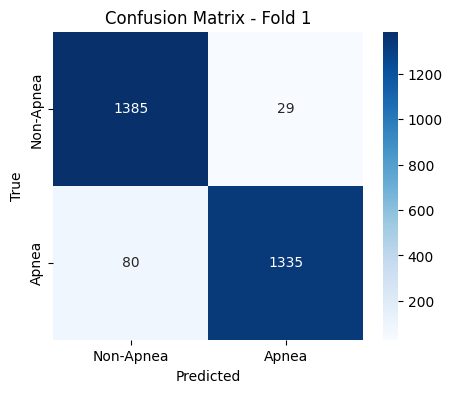

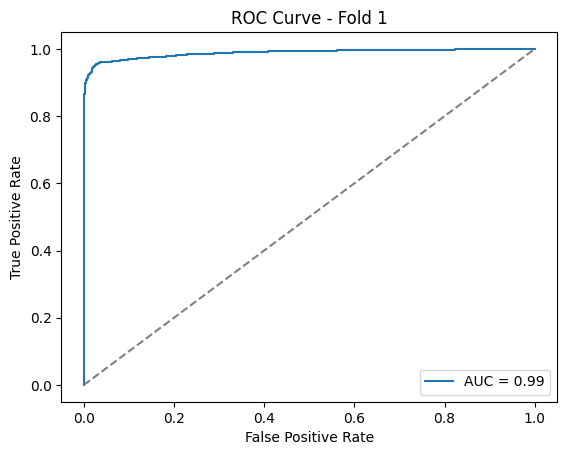

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1414
           1       0.98      0.94      0.96      1415

    accuracy                           0.96      2829
   macro avg       0.96      0.96      0.96      2829
weighted avg       0.96      0.96      0.96      2829

Fold 1: Acc=0.9615, F1=0.9608, Kappa=0.9229

===== Fold 2 =====


Fold 2 - Epoch 25/25: 100%|██████████| 354/354 [04:59<00:00,  1.18it/s]


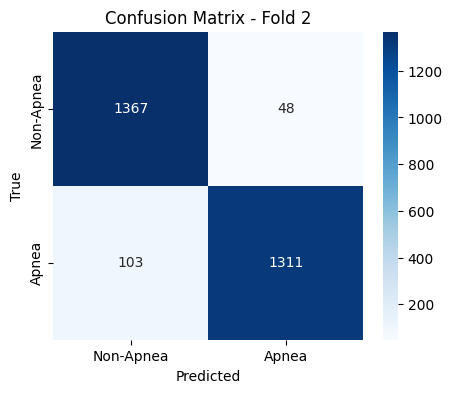

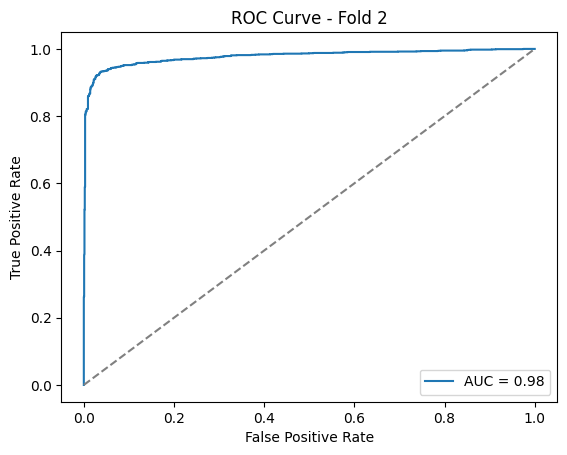

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1415
           1       0.96      0.93      0.95      1414

    accuracy                           0.95      2829
   macro avg       0.95      0.95      0.95      2829
weighted avg       0.95      0.95      0.95      2829

Fold 2: Acc=0.9466, F1=0.9455, Kappa=0.8932

===== Fold 3 =====


Fold 3 - Epoch 23/25:  34%|███▍      | 121/354 [01:18<02:30,  1.54it/s]

In [ ]:
# ======================================================
# High-Accuracy Apnea Detection (CNN + BiLSTM + Transformer)
# Modified to use exactly TARGET_PER_CLASS samples per class (apnea / non-apnea)
# Now with Confusion Matrix and ROC Curve plots per fold
# ======================================================

import os, wfdb, numpy as np
from scipy.signal import butter, filtfilt, find_peaks
from scipy.interpolate import interp1d
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, cohen_kappa_score, classification_report,
    confusion_matrix, roc_curve, auc
)
from torch.utils.data import Dataset, DataLoader
import torch, torch.nn as nn, torch.nn.functional as F
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Config
# ---------------------------
DATASET_PATH = "/kaggle/input/sleep-apnea/apnea-ecg-database-1.0.0/"
ORIG_FS = 100
WIN_MIN = 5
STRIDE_MIN = 1
WIN_SIZE = ORIG_FS * 60 * WIN_MIN
STEP = ORIG_FS * 60 * STRIDE_MIN
SEQ_LEN = 300
BATCH_SIZE = 32
EPOCHS = 25
LR = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SEED = 42

# For reproducibility
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Target per-class count
TARGET_PER_CLASS = 7071

# ---------------------------
# Preprocessing
# ---------------------------
def bandpass(sig, fs=ORIG_FS, low=3.0, high=45.0, order=4):
    nyq = 0.5*fs
    b, a = butter(order, [low/nyq, high/nyq], btype="band")
    return filtfilt(b, a, sig)

def detect_rpeaks(sig, fs=ORIG_FS):
    sig = sig - np.median(sig)
    th = np.median(np.abs(sig)) + 0.5*np.std(sig)
    min_dist = int(0.35*fs)
    peaks, _ = find_peaks(np.abs(sig), height=th, distance=min_dist)
    return peaks

def build_rri_ra(segment, fs=ORIG_FS):
    peaks = detect_rpeaks(segment, fs)
    if len(peaks) < 2:
        return None
    rri = np.diff(peaks) * 1000 / fs
    ra = segment[peaks[:-1]]
    return rri.astype(np.float32), ra.astype(np.float32)

def resample_seq(seq, target_len=SEQ_LEN):
    if len(seq) < 2:
        return np.zeros(target_len, dtype=np.float32)
    x_old = np.linspace(0, 1, len(seq))
    x_new = np.linspace(0, 1, target_len)
    f = interp1d(x_old, seq, kind="linear", fill_value="extrapolate")
    return f(x_new).astype(np.float32)

def augment_signal(sig):
    if random.random() < 0.5:
        sig = sig + 0.01*np.random.randn(len(sig))
    if random.random() < 0.5:
        sig = sig * (0.9 + 0.2*np.random.rand())
    if random.random() < 0.3:
        shift = int(0.05*len(sig))
        sig = np.roll(sig, shift)
    return sig

def build_index(records):
    idx = []
    for rec in records:
        try:
            ann = wfdb.rdann(os.path.join(DATASET_PATH, rec), "apn")
            labels = ann.symbol
            total_len = wfdb.rdrecord(os.path.join(DATASET_PATH, rec)).p_signal.shape[0]
        except:
            continue
        starts = range(0, total_len - WIN_SIZE + 1, STEP)
        for s in starts:
            minute = s // (ORIG_FS * 60)
            window_labels = labels[minute:minute + WIN_MIN]
            lab = 1 if "A" in window_labels else 0
            idx.append((rec, s, lab))
    return idx

# ---------------------------
# Dataset
# ---------------------------
class ApneaDataset(Dataset):
    def __init__(self, index, seq_len=SEQ_LEN, augment=False):
        self.seq_len = seq_len
        self.augment = augment
        random.shuffle(index)
        self.index = index

    def __len__(self):
        return len(self.index)

    def __getitem__(self, idx):
        rec, s, label = self.index[idx]
        rec_path = os.path.join(DATASET_PATH, rec)
        sig = wfdb.rdrecord(rec_path).p_signal[:, 0].astype(np.float32)

        window = sig[s:s + WIN_SIZE]
        if self.augment:
            window = augment_signal(window)

        window = bandpass(window)
        result = build_rri_ra(window)

        if result is None:
            feat_seq = np.zeros((self.seq_len, 2), dtype=np.float32)
        else:
            rri, ra = result
            rri = (rri - np.mean(rri)) / (np.std(rri) + 1e-6)
            ra = (ra - np.mean(ra)) / (np.std(ra) + 1e-6)
            feat_seq = np.stack(
                [resample_seq(rri, self.seq_len),
                 resample_seq(ra, self.seq_len)],
                axis=1
            )

        return torch.from_numpy(feat_seq), torch.tensor(label, dtype=torch.long)

# ---------------------------
# Model
# ---------------------------
class BranchCNNLSTM(nn.Module):
    def __init__(self, in_ch=2, conv_ch=64, hidden=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, conv_ch, 7, padding=3), nn.ReLU(), nn.BatchNorm1d(conv_ch),
            nn.Conv1d(conv_ch, conv_ch, 5, padding=2), nn.ReLU(), nn.BatchNorm1d(conv_ch),
            nn.Conv1d(conv_ch, conv_ch, 3, padding=1), nn.ReLU(), nn.BatchNorm1d(conv_ch),
        )
        self.pool = nn.AdaptiveAvgPool1d(100)
        self.lstm = nn.LSTM(conv_ch, hidden, batch_first=True, bidirectional=True)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv(x)
        x = self.pool(x)
        x = x.permute(0, 2, 1)
        _, (h, _) = self.lstm(x)
        return torch.cat([h[-2], h[-1]], dim=1)

class ApneaNet(nn.Module):
    def __init__(self, hidden=128, proj_dim=256):
        super().__init__()
        self.branch = BranchCNNLSTM(2, 64, hidden)
        self.proj = nn.Linear(hidden*2, proj_dim)
        encoder = nn.TransformerEncoderLayer(
            d_model=proj_dim, nhead=8, dim_feedforward=512, dropout=0.3, batch_first=True
        )
        self.trans = nn.TransformerEncoder(encoder, num_layers=3)
        self.fc = nn.Sequential(
            nn.Linear(proj_dim, 128), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        bfeat = self.branch(x)
        tokens = self.proj(bfeat).unsqueeze(1)
        out = self.trans(tokens).mean(dim=1)
        return self.fc(out)

# ---------------------------
# Training / Evaluation
# ---------------------------
def train_eval(train_idx, test_idx, all_index, class_weights=None, fold=0):
    train_ds = ApneaDataset([all_index[i] for i in train_idx], augment=True)
    test_ds = ApneaDataset([all_index[i] for i in test_idx], augment=False)
    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

    model = ApneaNet().to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=EPOCHS)

    if class_weights is not None:
        weights = torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)
        crit = nn.CrossEntropyLoss(weight=weights)
    else:
        crit = nn.CrossEntropyLoss()

    for ep in range(EPOCHS):
        model.train(); total_loss = 0.0
        pbar = tqdm(train_loader, desc=f"Fold {fold} - Epoch {ep+1}/{EPOCHS}")
        for X, y in pbar:
            X, y = X.to(DEVICE), y.to(DEVICE)
            opt.zero_grad()
            out = model(X)
            loss = crit(out, y)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            opt.step()
            total_loss += loss.item()
        scheduler.step()

    # Evaluation
    model.eval(); preds, gts, probs = [], [], []
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(DEVICE)
            out = model(X)
            pred = out.argmax(1).cpu().tolist()
            prob = F.softmax(out, dim=1)[:,1].cpu().numpy()
            preds += pred
            gts += y.tolist()
            probs += prob.tolist()

    acc = accuracy_score(gts, preds)
    f1 = f1_score(gts, preds, zero_division=0)
    kappa = cohen_kappa_score(gts, preds)

    # Confusion Matrix
    cm = confusion_matrix(gts, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Apnea","Apnea"], yticklabels=["Non-Apnea","Apnea"])
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(gts, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1],[0,1],"--",color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Fold {fold}")
    plt.legend(loc="lower right")
    plt.show()

    return acc, f1, kappa, classification_report(gts, preds, zero_division=0)

# ---------------------------
# MAIN
# ---------------------------
if __name__ == "__main__":
    records = [f"a{str(i).zfill(2)}" for i in range(1, 21)]
    index = build_index(records)
    if len(index) == 0:
        raise RuntimeError("No index entries found.")

    pos_list = [x for x in index if x[2] == 1]
    neg_list = [x for x in index if x[2] == 0]

    def get_fixed_samples(lst, target, rng_seed=SEED):
        random.seed(rng_seed)
        if len(lst) >= target:
            return random.sample(lst, target)
        else:
            extra = random.choices(lst, k=(target - len(lst)))
            return lst + extra

    pos_samples = get_fixed_samples(pos_list, TARGET_PER_CLASS)
    neg_samples = get_fixed_samples(neg_list, TARGET_PER_CLASS)

    balanced_index = pos_samples + neg_samples
    random.shuffle(balanced_index)

    labels = [x[2] for x in balanced_index]
    cw = [1.0, 1.0]

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    accs, f1s, kappas = [], [], []

    for fold, (train_idx, test_idx) in enumerate(skf.split(balanced_index, labels), 1):
        print(f"\n===== Fold {fold} =====")
        acc, f1, kappa, rep = train_eval(train_idx, test_idx, balanced_index, class_weights=cw, fold=fold)
        accs.append(acc); f1s.append(f1); kappas.append(kappa)
        print(rep)
        print(f"Fold {fold}: Acc={acc:.4f}, F1={f1:.4f}, Kappa={kappa:.4f}")

    print("\n==== Final Results ====")
    print(f"Accuracy: {np.mean(accs):.4f} ± {np.std(accs):.4f}")
    print(f"F1-score: {np.mean(f1s):.4f}")
    print(f"Cohen’s Kappa: {np.mean(kappas):.4f}")
